# Data Dive, Part II: Exploring Data

The second part of today's exercise takes a look at stock data downloaded from [Yahoo Finance](https://finance.yahoo.com/lookup). Stock returns can translate to enormous swings of wealth, and thus have long been the subject of statistical analysis. Today we'll take a look at just a handful of properties of stock returns. The file linked below includes all available data for four stocks: Apple (AAPL), Facebook (FB), General Electric (GE), and IBM (IBM), and one index: the Dow Jones Industrial Average (DJIA).  

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


#### Download Raw Data

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/stocks.csv')
raw_df.set_index('Date', inplace=True)
print('Raw rows: %i' % raw_df.shape[0])
price_df = raw_df.dropna(axis=0)
print('Full rows: %i' % price_df.shape[0])


Raw rows: 14280
Full rows: 1597


#### Transform Prices to Returns

In [3]:
return_df = price_df.pct_change(periods=1).dropna(axis=0)
return_df.tail(10)

,GE,IBM,AAPL,FB,DJIA
Date,,,,,
9/10/18,0.008871,0.001375,-0.013421,0.006992,-0.002295
9/11/18,-0.014389,0.005767,0.025283,0.010720,0.004408
9/12/18,0.022709,0.000546,-0.012419,-0.023744,0.001073
9/13/18,0.007930,0.016238,0.024155,-0.003951,0.005657
9/14/18,0.007149,-0.004162,-0.011351,0.005949,0.000332
9/17/18,0.001577,-0.002629,-0.026626,-0.010720,-0.003539
9/18/18,-0.003150,0.004191,0.001652,-0.001744,0.007092
9/19/18,0.015798,0.003366,0.000596,0.017218,0.006050
9/20/18,-0.031104,0.014021,0.007602,0.018153,0.009514


### Part I: Visualize Returns

Look at the Build histograms for the returns for each of the stocks. What do the distributions of these stocks look like?

In [4]:
def describe_returns(stock):
    return_df[stock].hist(density=True, bins=100)
    print(return_df[stock].describe())

count    1596.000000
mean        0.000039
std         0.011801
min        -0.082790
25%        -0.005667
50%         0.000087
75%         0.006192
max         0.088645
Name: IBM, dtype: float64


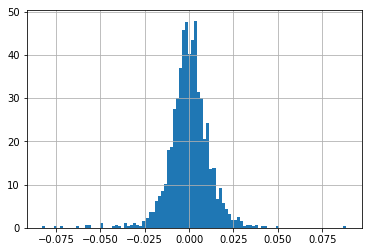

In [5]:
for stock in ['IBM']:
    describe_returns(stock)

Which is has the highest average return? Which is the most volatile?

1. Identify and plot the summary statistics to answer each of these 
2. Are there other plots that might also be useful in illustrating these concepts?

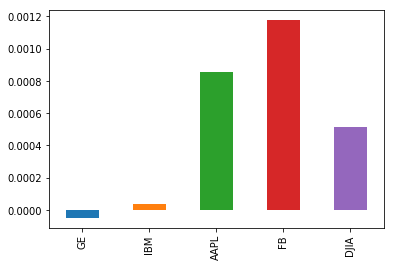

In [6]:
return_df.mean().plot.bar()

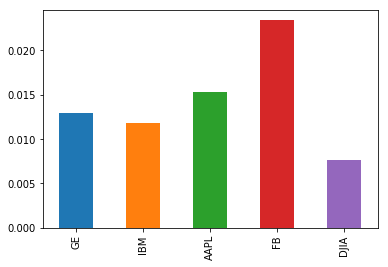

In [7]:
return_df.std().plot.bar()

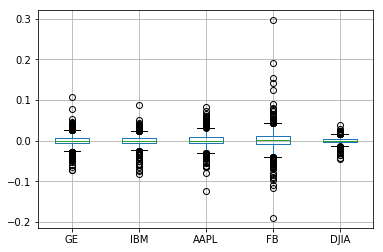

In [8]:
return_df.boxplot()

### Part II: Confidence Intervals

Based on this data, find the most you would lose on a \$10,000 investment with 95 percent and 99 percent confidence.
* Is it fair to call this a confidence interval?
* How else might you calculate such as confidence interval?
* [Time permitting] For the stocks with more data available, how does the inclusion of the historical returns change things?

In [9]:
return_df.quantile([0.01, 0.05])*10000

,GE,IBM,AAPL,FB,DJIA
0.01,-378.804348,-353.672390,-388.865738,-582.390419,-210.105596
0.05,-203.188549,-172.399996,-239.482145,-314.956837,-125.310548


### Part III: Correlation

For each of the four stocks, which are most correlated with each other?
* Why might this be the case?
* Can we visualize these correlations?

For each of the four stocks, which are most correlated with the broader market index?
* How might we use the data?
* If we regress these returns against the market which has the biggest slope and intercept?

In [10]:
return_df[['FB', 'AAPL', 'GE', 'IBM']].corr()

,FB,AAPL,GE,IBM
FB,1.000000,0.237430,0.187338,0.172981
AAPL,0.237430,1.000000,0.229567,0.289330
GE,0.187338,0.229567,1.000000,0.408434
IBM,0.172981,0.289330,0.408434,1.000000


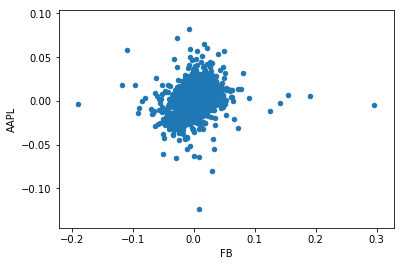

In [11]:
return_df.plot.scatter('FB', 'AAPL')

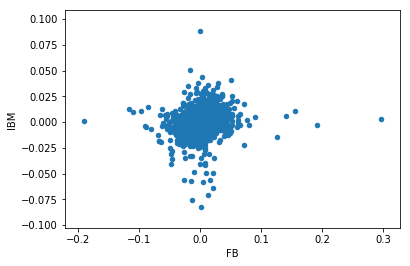

In [12]:
return_df.plot.scatter('FB', 'IBM')

In [13]:
alpha_fb, beta_fb = np.polyfit(df.DJIA.values, df.FB.values, 1)
alpha_ibm, beta_ibm = np.polyfit(df.DJIA.values, df.IBM.values, 1)
alpha_aapl, beta_aapl = np.polyfit(df.DJIA.values, df.AAPL.values, 1)
alpha_ge, beta_ge = np.polyfit(df.DJIA.values, df.GE.values, 1)

NameError: name 'np' is not defined

In [ ]:
plt.bar(['FB', 'IBM', 'GE', 'AAPL'], [alpha_fb, alpha_ibm, alpha_ge, alpha_aapl])

In [ ]:
plt.bar(['FB', 'IBM', 'GE', 'AAPL'], [beta_fb, beta_ibm, beta_ge, beta_aapl])